In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
np.random.seed(45)
X = np.random.rand(100 , 1) - 0.5
y = 3*X[: , 0] **2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()
df['X'] = X.reshape(y.shape)
df['y'] = y

In [4]:
df

,X,y
0,0.489012,0.623234
1,0.049545,0.018429
2,-0.218553,0.234126
3,-0.422710,0.623197
4,-0.055531,0.006227
...,...,...
95,0.488986,0.691116
96,0.340792,0.404603
97,-0.066900,0.040155
98,0.222755,0.158873


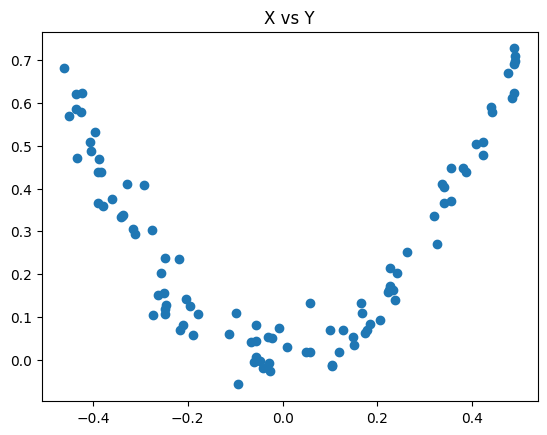

In [5]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')
plt.show()

In [6]:
df['pred_1'] = df['y'].mean()

In [7]:
df['res_1'] = df['y'] - df['pred_1']

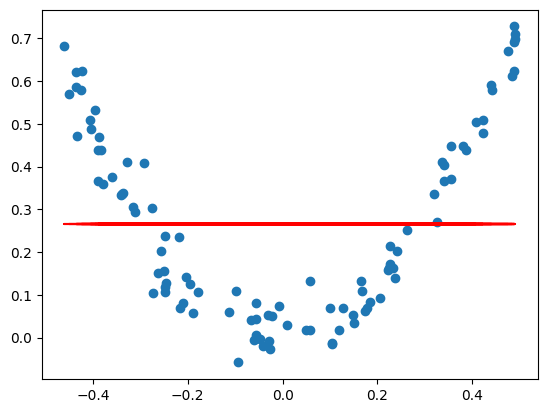

In [8]:
plt.scatter(df['X'] , df['y'])
plt.plot(df['X'] , df['pred_1'] , color = 'r')
plt.show()

In [9]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # 8-32

In [10]:
tree1.fit(df['X'].values.reshape(100,1) , df['res_1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

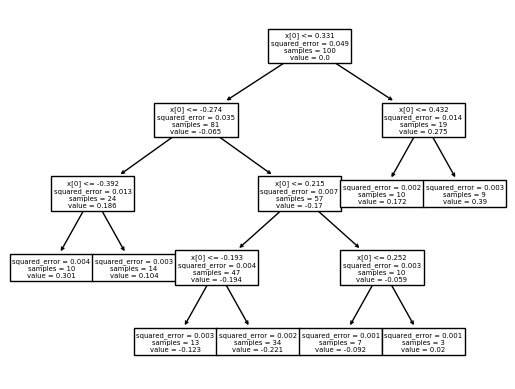

In [11]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [12]:
df['y'].mean()

0.2655525316906224

In [13]:
# generating X_test

X_test = np.linspace(-0.5,0.5,500)
y_pred = 0.2655525316906224 + tree1.predict(X_test.reshape(500,1))

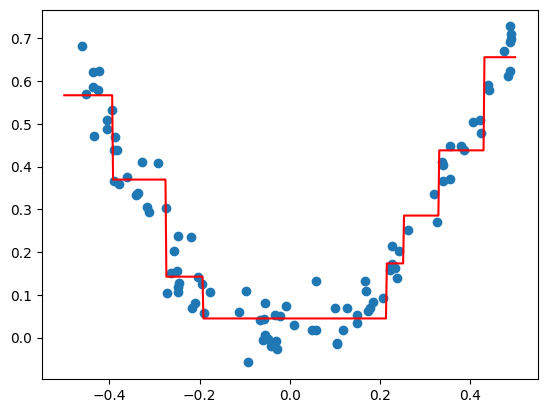

In [14]:
# Overall prediction of model1 + model2
plt.scatter(df['X'] , df['y'])
plt.plot(X_test,y_pred , color = 'r')
plt.show()

In [15]:
df['pred_2'] = 0.2655525316906224 + tree1.predict(df['X'].values.reshape(100,1))

In [16]:
df['res_2'] = df['y'] - df['pred_2']

In [17]:
df

,X,y,pred_1,res_1,pred_2,res_2
0,0.489012,0.623234,0.265553,0.357681,0.655627,-0.032393
1,0.049545,0.018429,0.265553,-0.247124,0.044660,-0.026231
2,-0.218553,0.234126,0.265553,-0.031427,0.142364,0.091762
3,-0.422710,0.623197,0.265553,0.357644,0.566599,0.056598
4,-0.055531,0.006227,0.265553,-0.259326,0.044660,-0.038433
...,...,...,...,...,...,...
95,0.488986,0.691116,0.265553,0.425564,0.655627,0.035490
96,0.340792,0.404603,0.265553,0.139050,0.437790,-0.033188
97,-0.066900,0.040155,0.265553,-0.225397,0.044660,-0.004505
98,0.222755,0.158873,0.265553,-0.106680,0.173408,-0.014535


In [18]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [19]:
tree2.fit(df['X'].values.reshape(100,1) , df['res_2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [20]:
y_pred = 0.2655525316906224 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

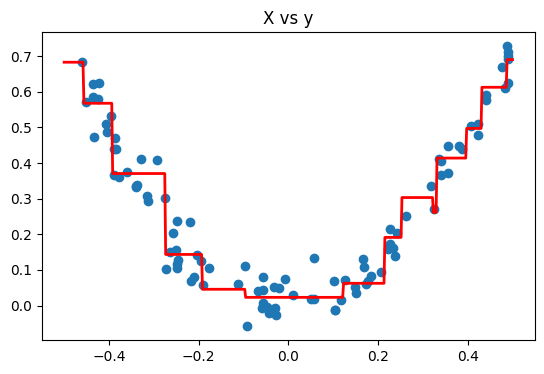

In [21]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.scatter(df['X'] , df['y'])
plt.plot(X_test , y_pred , linewidth = 2 , color = 'r')
plt.title('X vs y')
plt.show()

In [22]:
df.head(5)

,X,y,pred_1,res_1,pred_2,res_2
0,0.489012,0.623234,0.265553,0.357681,0.655627,-0.032393
1,0.049545,0.018429,0.265553,-0.247124,0.044660,-0.026231
2,-0.218553,0.234126,0.265553,-0.031427,0.142364,0.091762
3,-0.422710,0.623197,0.265553,0.357644,0.566599,0.056598
4,-0.055531,0.006227,0.265553,-0.259326,0.044660,-0.038433


In [23]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

      if number == 0:
        return 
      else:
        # do gradient boosting

        if count > 1:
            y = y - regs[-1].predict(X) # pseudo residual
        else:
            foo = y

        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y) # tree_reg.fit(df['X'] , df['pred_n']) kindof

        regs.append(tree_reg)

        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs) # 1*m1->1*m1+1*m2->1*m1+1*m2+1*m3...

        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], foo,"r.")
        plt.show()
        
        
        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo) # recursion

     

5


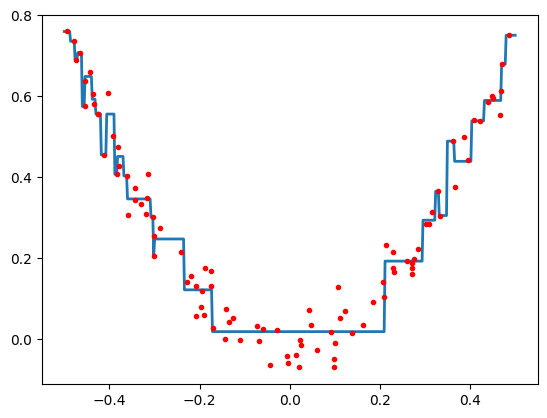

4


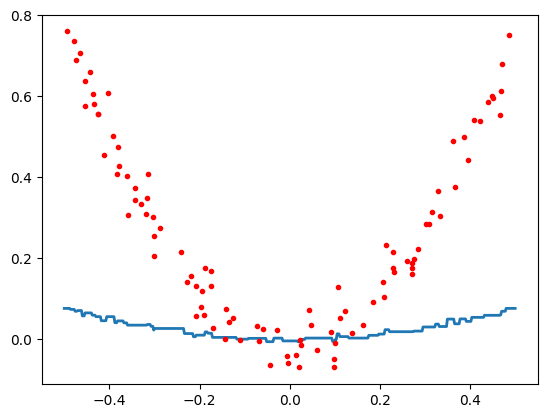

3


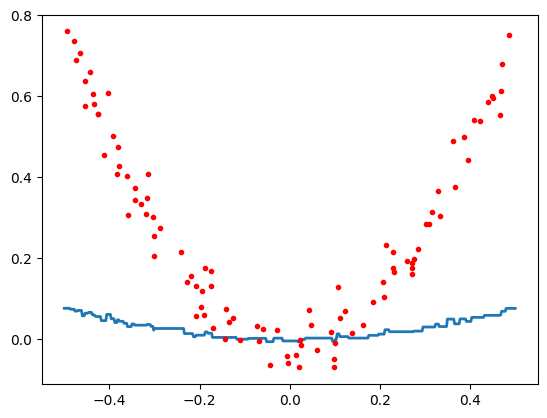

2


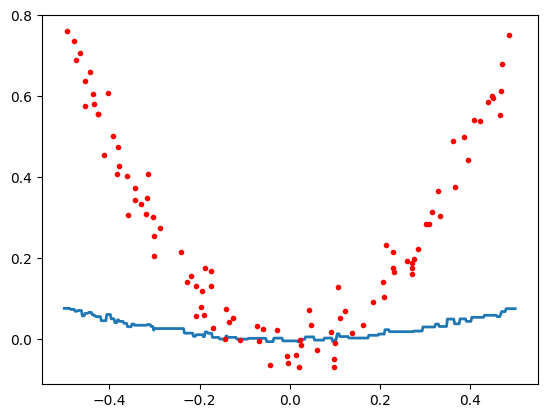

1


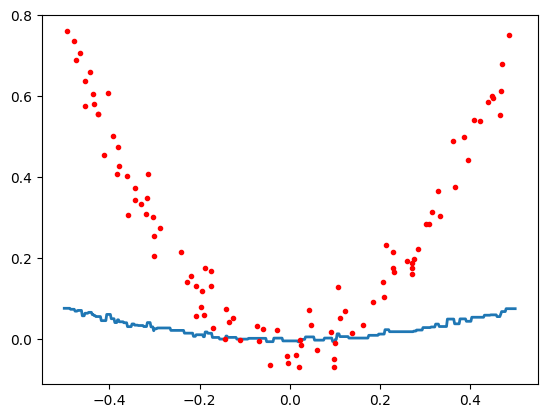

In [24]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,number = 5,lr=1)

In [25]:
x1 = np.linspace(-0.5, 0.5, 500)
x1.reshape(-1,1)

array([[-0.5       ],
       [-0.49799599],
       [-0.49599198],
       [-0.49398798],
       [-0.49198397],
       [-0.48997996],
       [-0.48797595],
       [-0.48597194],
       [-0.48396794],
       [-0.48196393],
       [-0.47995992],
       [-0.47795591],
       [-0.4759519 ],
       [-0.4739479 ],
       [-0.47194389],
       [-0.46993988],
       [-0.46793587],
       [-0.46593186],
       [-0.46392786],
       [-0.46192385],
       [-0.45991984],
       [-0.45791583],
       [-0.45591182],
       [-0.45390782],
       [-0.45190381],
       [-0.4498998 ],
       [-0.44789579],
       [-0.44589178],
       [-0.44388778],
       [-0.44188377],
       [-0.43987976],
       [-0.43787575],
       [-0.43587174],
       [-0.43386774],
       [-0.43186373],
       [-0.42985972],
       [-0.42785571],
       [-0.4258517 ],
       [-0.4238477 ],
       [-0.42184369],
       [-0.41983968],
       [-0.41783567],
       [-0.41583166],
       [-0.41382766],
       [-0.41182365],
       [-0

In [26]:
x1 = np.linspace(-0.5, 0.5, 500)
x1.shape

(500,)